# Iris Flower Classification with Scikit-Learn

![Iris](https://github.com/featurestoreorg/serverless-ml-course/raw/main/src/01-module/assets/iris.png)


In this notebook we will,

1. Load the Iris Flower dataset into Pandas from a CSV file
2. Split training data into train and test sets (one train/test set each for both the features and labels)
3. Train a KNN Model using SkLearn
4. Evaluate model performance on the test set
5. Visually query the model "predictive analytics"

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training.

So, let's download the iris dataset, and preview some rows.

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [2]:
iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
26,5.0,3.4,1.6,0.4,Setosa
15,5.7,4.4,1.5,0.4,Setosa
66,5.6,3.0,4.5,1.5,Versicolor
119,6.0,2.2,5.0,1.5,Virginica
50,7.0,3.2,4.7,1.4,Versicolor
65,6.7,3.1,4.4,1.4,Versicolor
126,6.2,2.8,4.8,1.8,Virginica
4,5.0,3.6,1.4,0.2,Setosa
142,5.8,2.7,5.1,1.9,Virginica
24,4.8,3.4,1.9,0.2,Setosa


We can see that our 3 different classes of iris flowers have different *petal_lengths*
(although there are some overlapping regions between Versicolor and the two other varieties (Setoas, Virginica))

/var/folders/bk/84j_50tn7jdbflqw9b3p6sc80000gq/T/ipykernel_1194/1655760583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variety', y='sepal_length', data=iris_df, palette="Set3")


<Axes: xlabel='variety', ylabel='sepal_length'>

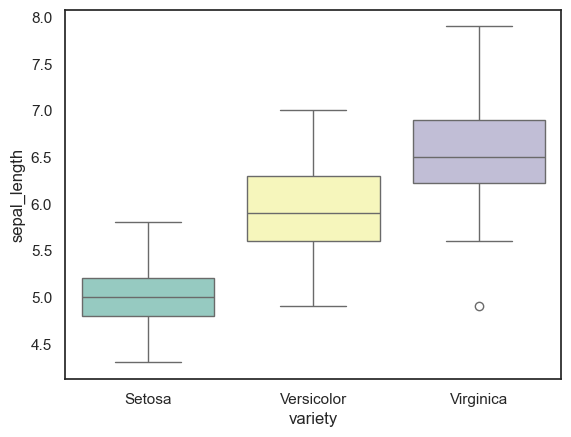

In [8]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_length', data=iris_df, palette="Set3")

/var/folders/bk/84j_50tn7jdbflqw9b3p6sc80000gq/T/ipykernel_1194/3982715140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variety', y='sepal_width', data=iris_df, palette="Set3")


<Axes: xlabel='variety', ylabel='sepal_width'>

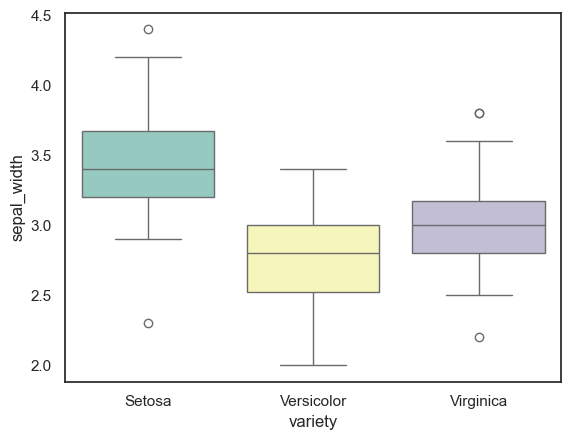

In [9]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_width', data=iris_df, palette="Set3")

/var/folders/bk/84j_50tn7jdbflqw9b3p6sc80000gq/T/ipykernel_1194/2770214789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variety', y='petal_length', data=iris_df, palette="Set3")


<Axes: xlabel='variety', ylabel='petal_length'>

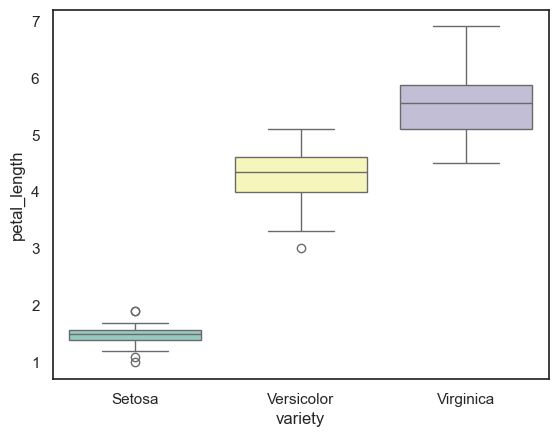

In [10]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_length', data=iris_df, palette="Set3")

/var/folders/bk/84j_50tn7jdbflqw9b3p6sc80000gq/T/ipykernel_1194/376173937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variety', y='petal_width', data=iris_df, palette="Set3")


<Axes: xlabel='variety', ylabel='petal_width'>

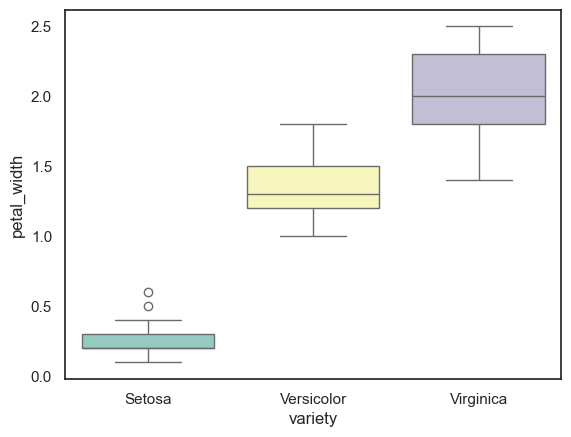

In [6]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_width', data=iris_df, palette="Set3")

We need to split our DataFrame into two Dataframes.

* The **features** DataFrame will contain the inputs for training/inference.
* The **labels** DataFrame will contain the target we are trying to predict.

Note, that the ordering of the rows is preserved between the features and labels. For example, 'row 40' in the **features** DataFrame contains the correct features for 'row 40' in the **labels** DataFrame. That is, the row index acts like a common "join key" between the two DataFrames.

Split the DataFrame into 2: one DataFrame containing the *features* and one containing the *labels*.

In [12]:
features = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
labels = iris_df[["variety"]]
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
labels

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


We can split our features and labels into a **train_set** and a **test_set**. You split your data into a train_set and a test_set, because you want to train your model on only the train_set, and then evaluate its performance on data that was not seen during training, the test_set. This technique helps evaluate the ability of your model to accurately predict on data it has not seen before.

This looks as follows:

* **X_** is a vector of features, so **X_train** is a vector of features from the **train_set**.
* **y_** is a scale of labels, so **y_train** is a scalar of labels from the **train_set**.

Note: a vector is an array of values and a scalar is a single value.

Note: that mathematical convention is that a vector is denoted by an uppercase letter (hence "X") and a scalar is denoted by a lowercase letter (hence "y").

**X_test** is the features and **y_test** is the labels from our holdout **test_set**. The **test_set** is used to evaluate model performance after the model has been trained.


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)
y_train

,variety
64,Versicolor
67,Versicolor
8,Setosa
139,Virginica
85,Versicolor
...,...
58,Versicolor
26,Setosa
99,Versicolor
37,Setosa


We can see that our original lables (**y_train** and **y_test**) are categorical variables.

We could transform the label from a categorical variable (a string) into a numerical variable (an int). Many machine learning training algorithms only take numerical values as inputs for training (and inference).
However, our ML algorithm, KNeighborsClassifier, works with categorical variables as labels.

A useful exercise here is to use Scikit-Learn's LabelEncoder to transform the labels to a numerical representation.

Now, we can fit a model to our features and labels from our training set (**X_train** and **y_train**). Fitting a model to a dataset is more commonly called "training a model".

In [15]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

Now, we have trained our model. We can evaluate our model on the **test_set** to estimate its performance.

Scikit-Learn's KNeighborsClassifier take a DataFrame as input and returns a list of predictions.

Notice that for each input feature vector (containing our 4 features: sepal_length, sepal_width, petal_length, petal_width), the model returns a prediction of the type of flower.

In [16]:
y_pred = model.predict(X_test)
y_pred

array(['Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Setosa'],
      dtype=object)

We can report on how accurate these predictions (**y_pred**) are compared to the labels (the actual results - **y_test**).

In [17]:
from sklearn.metrics import classification_report

metrics = classification_report(y_test, y_pred, output_dict=False)
print(metrics)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.92      1.00      0.96        11
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)
print(results)

[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]


Notice in the confusion matrix results that we have 1 or 2 incorrect predictions.
We have only 30 flowers in our test set - **y_test**.
Our model predicted 1 or 2 flowers were of type "Virginica", but the flowers were, in fact, "Versicolor".

<Axes: >

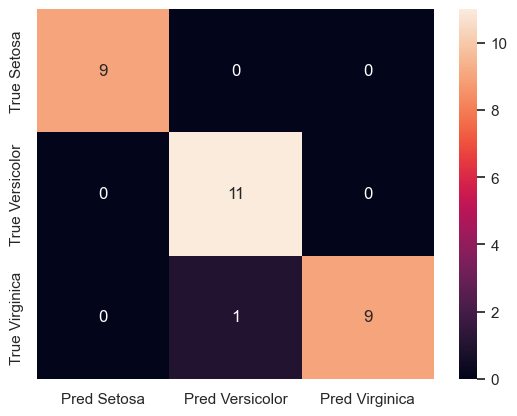

In [19]:
from matplotlib import pyplot

df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                     ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

sns.heatmap(df_cm, annot=True)

Updated gradio code.

In [21]:
!pip install gradio --quiet
#!pip install typing-extensions==4.3.0

In [22]:
import gradio as gr
import numpy as np
from PIL import Image
import requests


def iris(sepal_length, sepal_width, petal_length, petal_width):
    input_list = []
    input_list.append(sepal_length)
    input_list.append(sepal_width)
    input_list.append(petal_length)
    input_list.append(petal_width)
    # 'res' is a list of predictions returned as the label.
    res = model.predict(np.asarray(input_list).reshape(1, -1))
    # We add '[0]' to the result of the transformed 'res', because 'res' is a list, and we only want
    # the first element.
#     flower_url = "https://repo.hops.works/master/hopsworks-tutorials/data/" + res[0] + ".png"
    flower_url = "https://raw.githubusercontent.com/featurestoreorg/serverless-ml-course/main/src/01-module/assets/" + res[0] + ".png"
    img = Image.open(requests.get(flower_url, stream=True).raw)
    return img

demo = gr.Interface(
    fn=iris,
    title="Iris Flower Predictive Analytics",
    description="Experiment with sepal/petal lengths/widths to predict which flower it is.",
    allow_flagging="never",
    inputs=[
        gr.Number(value=1.0, label="sepal length (cm)"),
        gr.Number(value=1.0, label="sepal width (cm)"),
        gr.Number(value=1.0, label="petal length (cm)"),
        gr.Number(value=1.0, label="petal width (cm)"),
        ],
    outputs=gr.Image(type="pil"))

demo.launch(share=True)

/opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: /opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/gradio/frpc_darwin_arm64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_darwin_arm64
2. Rename the downloaded file to: frpc_darwin_arm64_v0.2
3. Move the file to this location: /opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/gradio


/opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/hopwsworks/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature nam